In [1]:

import sys
import torch
import os
import numpy as np

from torch.distributions.uniform import Uniform


In [2]:
lunarc = 0

In [3]:

# Set wd
print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/spa/seq-posterior-approx-w-nf-dev/two_moons')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons')

sys.path.append('./')

print(os.getcwd())

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons


In [4]:
import functions as func
from sbi.utils import BoxUniform

In [8]:
prior = BoxUniform(low=-2*torch.ones(2), high=2*torch.ones(2))

x_o, model = func.set_up_model(prior)

In [9]:
post_samples = model.gen_posterior_samples(x_o,1000)


In [10]:
post_samples

tensor([[-0.4712, -1.6315],
        [ 0.3809,  1.6364],
        [-1.5980, -0.6204],
        ...,
        [-0.7997, -1.6374],
        [ 1.1347,  1.6205],
        [-1.5401, -1.0983]])

(-2.0, 2.0)

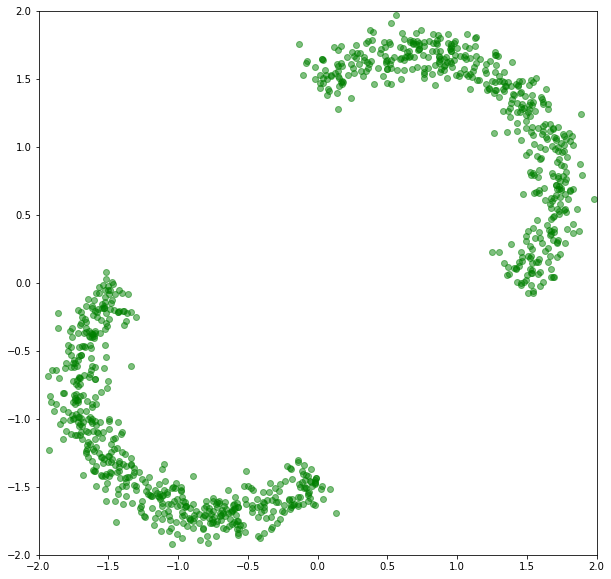

In [11]:
# Plot post samples

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

plt.scatter(post_samples.numpy()[:,0],post_samples.numpy()[:,1],alpha = 0.5,color = "g")
plt.ylim((-2, 2))
plt.xlim((-2, 2))

In [12]:
import TwoMoons

In [13]:
x_model = model.model_sim(post_samples)

# but wait this is the posterior pred!

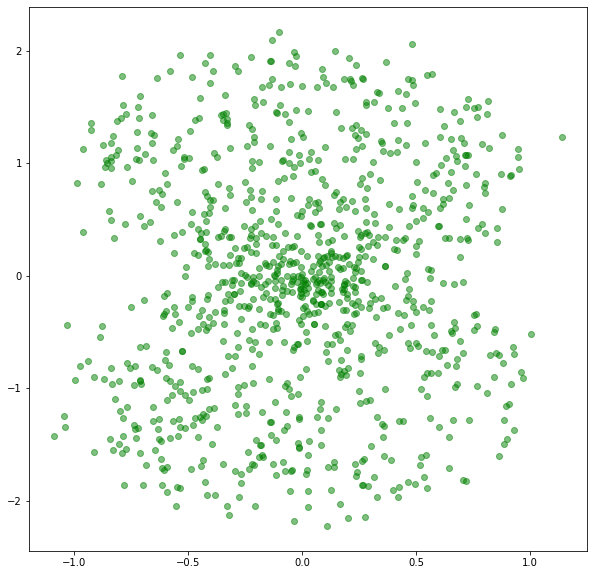

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

plt.scatter(x_model.detach().numpy()[:,0],x_model.detach().numpy()[:,1],alpha = 0.5,color = "g")
#plt.ylim((-2, 3))
#plt.xlim((-2, 2))


In [15]:
dim = 2
seed = 1

import numpy as np

torch.manual_seed(seed)

post_samples = model.gen_posterior_samples(x_o,1000)

np.savetxt('data/true_posterior_' + str(dim) + '_' + str(seed) + '.csv', post_samples.numpy(), delimiter=",")


In [16]:
post_pred = model.model_sim(post_samples)

np.savetxt('data/true_post_pred_' + str(dim) + '_' + str(seed) + '.csv', post_pred.numpy(), delimiter=",")